# ** Videogames 2017 - Twitter Data Analysis ** #
Videogame is big now. The industry has grown so much over its short history that videogames are now equivalent and many times even surpass the movie industry!(at least in term of sales and popularity). And this trend will just be continuing to be more and more true as we dive into the 21st century. 

In this notebook, I analyze the tweets I obtained from the "scrape.py" and "dump.py" programs to see what game is the most popular for twitter all around the world.

In [1]:
# import some neccesary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.analysis import get_games, tweet_lengths

# magic funcitons for jupyter notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

## **1. Load the data ** ##
The program "scrape.py" is used to get access to the Twitter streaming API. Using that script, I was able to "stream" over a few hours all the Tweets that had the hashtag of some of the most popular video games released between 11 January and 15 March of 2017. Then I used the script "dump.py" to dump the data into an easy to read .csv file.

Here is the list of the 10 of the most talked about video games of 2017 so far that I filtered: 
- #BreathOfTheWild: The newest game from the legendary series Zelda, intended to be the main "selling-game" for Switch, the most recent console-handheld hybrid system of Nintendo.
- #shovelknight: An updated version of Shovel knight, a 2D side-scrolling platform game that was newly released for Switch.
- #nierautomata: An action role-playing game directed by Yoko Taro, one of the most eccentric game designer in the industry! The game is on PS4 and also PC too.
- #nioh: A PS4 exclusived action role-playing game with a combat system inspired by the "Souls" series.
- #nightinthewoods: An indie anventure game developed for PS4 and PC.
- #ResidentEvil7: A reboot of the classic survival horror series game Resident Evil.
- #TormentTidesOfNumenera: The spiritual sequel to the cult-class role-playing game Planescape Torment.
- #yakuza0: An open-world, action-adventure game that as a the sequel to the entire Yakuza series.
- #hollowknight: An indie game in the style of "metroidvania", with beautiful hand-drawn art style.

In [2]:
# load the data into a dataframe
df = pd.read_csv('games_tweets.csv')
df.head()

,id,user_description,user_location,coordinates,text,geo,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,polarity,subjectivity
0,1,| Name: Andy | Age: 19 | Gender: Female | Dog ...,Fandom Hell,NaN,RT @TITANSofCOSPLAY: Aloy #cosplay by @IlonaBu...,NaN,NoctisLCatchem,2012-04-04T02:56:47,59,841923464961376256,2017-03-15T08:06:10,0,000000,0.0,0.0
1,2,"BB, #blogueur et #Youtubeur #Cinema #JeuxVideo...",NaN,NaN,Quel temps de merde...\n#Ps4 #Aloy #HorizonZer...,NaN,_BBBuzz,2011-07-18T20:08:35,1292,841923473123508224,2017-03-15T08:06:12,0,022330,0.0,0.0
2,3,Bee yourself.,Hyrule,NaN,love filling this up #BreathoftheWild #Nintend...,NaN,swolepepe,2015-08-31T02:16:51,75,841923474193014785,2017-03-15T08:06:13,0,C0DEED,0.5,0.6
3,4,"It is said that one man is not two, but three ...","Duluth, MN",NaN,#BreathoftheWild #NintendoSwitch https://t.co/...,NaN,Otofuniki64,2013-07-09T00:53:39,32,841923474486624258,2017-03-15T08:06:13,0,000000,0.0,0.0
4,5,No eres tú. Soy yo.,Villarrobledo City,NaN,RT @JohnCarca: Esto es lo que pasa cuando cons...,NaN,DavidJuampax,2011-08-21T14:48:23,153,841923476311154690,2017-03-15T08:06:13,0,C0DEED,0.0,0.0


In [3]:
df.columns

Index(['id', 'user_description', 'user_location', 'coordinates', 'text', 'geo',
       'user_name', 'user_created', 'user_followers', 'id_str', 'created',
       'retweet_count', 'user_bg_color', 'polarity', 'subjectivity'],
      dtype='object')

The most important features that are of interest are:
- 'text': the text content of the tweet
- 'user_created': the day when the user account was created
- 'created': the time the tweet was sent
- 'polarity': the sentiment analyzied from the text content, using TextBlob, a Natural Language Processing library for Python. This polarity value range from -1 to 1, where -1 is very negative, 0 is neutral, and 1 is very positive.
- 'subjectivity': also computed using TextBlob. It range from 0 to 1, where 0 is very objective, and 1 is very subjective.

In [4]:
df.shape

(27362, 15)

So I had streamed over 27000 tweets from all over the world on these 10 games in just 2 or 3 hours. Next, we have to clean the data before analyzing it.

## **2. Data Cleaning ** ##

In [5]:
df["coordinates"].isnull().sum()

27353

In [6]:
df["geo"].isnull().sum()

27353

I coundn't acquire most of the information on the "coordinates" and "geo" columns of the tweets, so it is best to just remove them.

In [7]:
df = df.drop(["coordinates", "geo", "id"], axis=1)

Next I generate a "games" column that store the hashtags mentioned in the tweets.

In [8]:
df["games"] = df.apply(get_games, axis = 1)
df.head()

,user_description,user_location,text,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,polarity,subjectivity,games
0,| Name: Andy | Age: 19 | Gender: Female | Dog ...,Fandom Hell,RT @TITANSofCOSPLAY: Aloy #cosplay by @IlonaBu...,NoctisLCatchem,2012-04-04T02:56:47,59,841923464961376256,2017-03-15T08:06:10,0,000000,0.0,0.0,#horizonzerodawn
1,"BB, #blogueur et #Youtubeur #Cinema #JeuxVideo...",NaN,Quel temps de merde...\n#Ps4 #Aloy #HorizonZer...,_BBBuzz,2011-07-18T20:08:35,1292,841923473123508224,2017-03-15T08:06:12,0,022330,0.0,0.0,#horizonzerodawn
2,Bee yourself.,Hyrule,love filling this up #BreathoftheWild #Nintend...,swolepepe,2015-08-31T02:16:51,75,841923474193014785,2017-03-15T08:06:13,0,C0DEED,0.5,0.6,#breathofthewild
3,"It is said that one man is not two, but three ...","Duluth, MN",#BreathoftheWild #NintendoSwitch https://t.co/...,Otofuniki64,2013-07-09T00:53:39,32,841923474486624258,2017-03-15T08:06:13,0,000000,0.0,0.0,#breathofthewild
4,No eres tú. Soy yo.,Villarrobledo City,RT @JohnCarca: Esto es lo que pasa cuando cons...,DavidJuampax,2011-08-21T14:48:23,153,841923476311154690,2017-03-15T08:06:13,0,C0DEED,0.0,0.0,


It seem like some of the tweets have no hashtag of the relevent video games, so it is best to just remove them.

In [9]:
# replace white space with NaN
df["games"] = df["games"].apply(lambda x: x.strip()).replace('', np.nan)
df.head()

,user_description,user_location,text,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,polarity,subjectivity,games
0,| Name: Andy | Age: 19 | Gender: Female | Dog ...,Fandom Hell,RT @TITANSofCOSPLAY: Aloy #cosplay by @IlonaBu...,NoctisLCatchem,2012-04-04T02:56:47,59,841923464961376256,2017-03-15T08:06:10,0,000000,0.0,0.0,#horizonzerodawn
1,"BB, #blogueur et #Youtubeur #Cinema #JeuxVideo...",NaN,Quel temps de merde...\n#Ps4 #Aloy #HorizonZer...,_BBBuzz,2011-07-18T20:08:35,1292,841923473123508224,2017-03-15T08:06:12,0,022330,0.0,0.0,#horizonzerodawn
2,Bee yourself.,Hyrule,love filling this up #BreathoftheWild #Nintend...,swolepepe,2015-08-31T02:16:51,75,841923474193014785,2017-03-15T08:06:13,0,C0DEED,0.5,0.6,#breathofthewild
3,"It is said that one man is not two, but three ...","Duluth, MN",#BreathoftheWild #NintendoSwitch https://t.co/...,Otofuniki64,2013-07-09T00:53:39,32,841923474486624258,2017-03-15T08:06:13,0,000000,0.0,0.0,#breathofthewild
4,No eres tú. Soy yo.,Villarrobledo City,RT @JohnCarca: Esto es lo que pasa cuando cons...,DavidJuampax,2011-08-21T14:48:23,153,841923476311154690,2017-03-15T08:06:13,0,C0DEED,0.0,0.0,NaN


In [10]:
df["games"].isnull().sum()

1124

In [11]:
df = df.dropna(axis=0, subset=['games'])
df.head()

,user_description,user_location,text,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,polarity,subjectivity,games
0,| Name: Andy | Age: 19 | Gender: Female | Dog ...,Fandom Hell,RT @TITANSofCOSPLAY: Aloy #cosplay by @IlonaBu...,NoctisLCatchem,2012-04-04T02:56:47,59,841923464961376256,2017-03-15T08:06:10,0,000000,0.0,0.0,#horizonzerodawn
1,"BB, #blogueur et #Youtubeur #Cinema #JeuxVideo...",NaN,Quel temps de merde...\n#Ps4 #Aloy #HorizonZer...,_BBBuzz,2011-07-18T20:08:35,1292,841923473123508224,2017-03-15T08:06:12,0,022330,0.0,0.0,#horizonzerodawn
2,Bee yourself.,Hyrule,love filling this up #BreathoftheWild #Nintend...,swolepepe,2015-08-31T02:16:51,75,841923474193014785,2017-03-15T08:06:13,0,C0DEED,0.5,0.6,#breathofthewild
3,"It is said that one man is not two, but three ...","Duluth, MN",#BreathoftheWild #NintendoSwitch https://t.co/...,Otofuniki64,2013-07-09T00:53:39,32,841923474486624258,2017-03-15T08:06:13,0,000000,0.0,0.0,#breathofthewild
5,うたね屋というサークル名で同人活動してますです。 \r\nたまにKTCさんの所で絵や漫画描か...,NaN,@tirorian ほらよw #ゼルダの伝説 #BreathoftheWild #Ninte...,sion_utane,2015-09-30T16:12:51,407,841923476965453824,2017-03-15T08:06:13,0,000000,0.0,0.0,#breathofthewild


In [12]:
# get a list of hashtag
hashtag_list = df["games"].unique()
hashtag_list

array(['#horizonzerodawn', '#breathofthewild', '#nightinthewoods',
       '#nierautomata', '#residentevil7', '#nioh', '#hollowknight',
       '#yakuza0', '#shovelknight', '#horizonzerodawn,#nioh',
       '#tormenttidesofnumenera', '#horizonzerodawn,#nierautomata',
       '#breathofthewild,#horizonzerodawn',
       '#horizonzerodawn,#nierautomata,#nioh'], dtype=object)

Most of the tweets mentioned one single game in their text, but some tweets use multiple hashtags, meaning that user tweeted about multiple games in a same tweet. 

## **3. Exploratory Analysis ** ##

First, we want to know how many tweets mentioned each game in the same streaming time

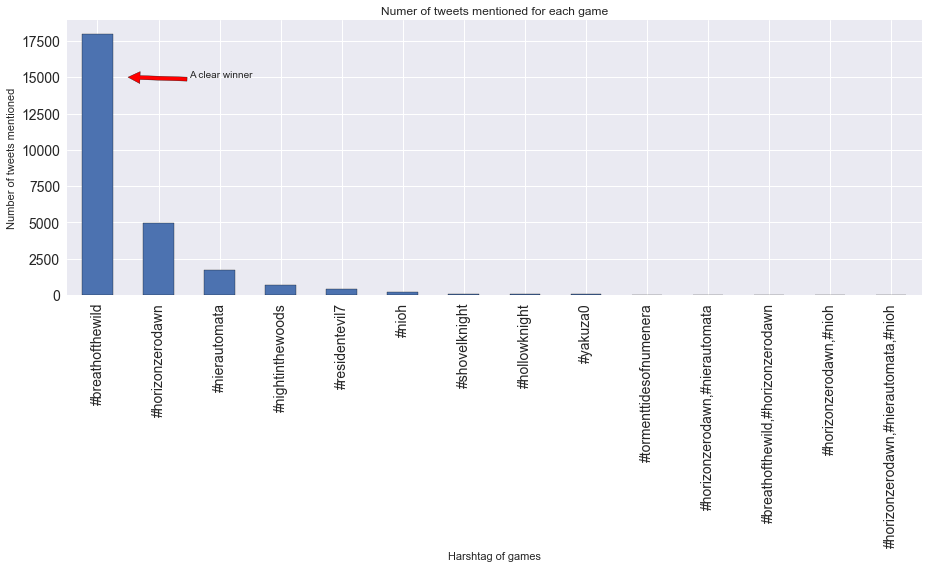

In [13]:
tweets_counts = df["games"].value_counts()
tweets_counts = pd.DataFrame(data=tweets_counts)
ax = tweets_counts.plot.bar(figsize=(13, 8), edgecolor='k', fontsize=14,
                            title='Numer of tweets mentioned for each game', legend=False)
ax.set(xlabel='Harshtag of games', ylabel='Number of tweets mentioned')
ax.annotate('A clear winner', xy=(0.5, 15000), xytext=(1.5, 15000),
            arrowprops=dict(facecolor='r'))

plt.tight_layout()

The barplot clearly indicating that the new Zelda game is the most often tweeted about! The number of tweets mentioning #breathofthewild alone is bigger than the sum of all the other tweets of the other 9 games! The fanbase of Zelda is very hugh indeed, and it seem like Switch is also another success for Nintendo.

Aside from the tweets that used multiple hashtags, the leasted tweeted about game here is #tormenttidesofnumenera, which barely have any tweets at all. This is not that suprising  because Tormen: Tide of Numenera is a very text-heavy role-playing game, where players actually spend most of their time reading instead of "playing". This is a very niche but exciting type of gaming.

Next, we can see the distribution of account ages. 

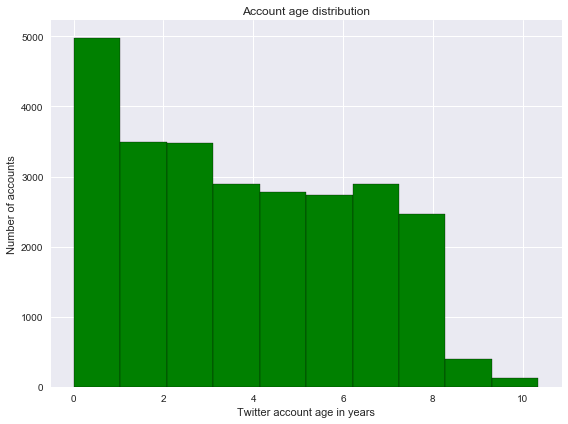

In [17]:
from datetime import datetime

df["created"] = pd.to_datetime(df["created"])
df["user_created"] = pd.to_datetime(df["user_created"])

df["user_age"] = df["user_created"].apply(lambda 
                                                x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)

ax = df["user_age"].plot.hist(figsize=(8, 6), edgecolor='k', title='Account age distribution', color='g')
ax.set(xlabel='Twitter account age in years', ylabel='Number of accounts')

plt.tight_layout()

So there are more young account (with less than 4 years of activity) than old account. This is correlate with the fact that gaming is a very popular thing among younger people. But we can also see that there are quite a lot of old account (even more than 10 years!) that still tweet about gaming!

Next, we want to know about the general sentiment of Twitters about these 10 video games. We can visualize the mean and standard deviation of the "polarity" feature for this task.

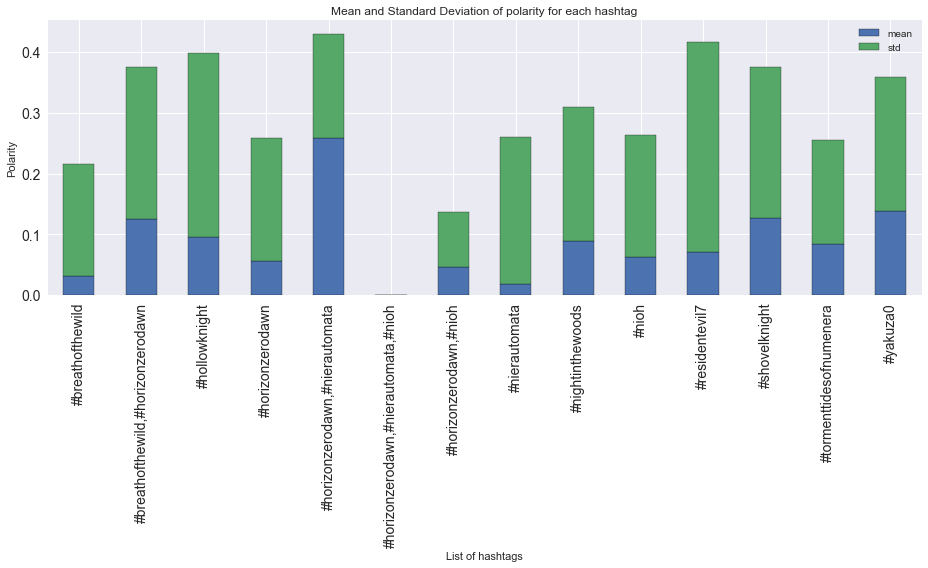

In [15]:
group1 = df.groupby("games").agg([np.mean, np.std])
ax = group1["polarity"][["mean", "std"]].plot.bar(stacked=True, figsize=(13, 8), fontsize=14,
                                                 edgecolor='k', title='Mean and Standard Deviation of polarity for each hashtag')
ax.set(xlabel='List of hashtags', ylabel='Polarity')
plt.tight_layout()

The 'polarity' values have a range of -2 (from -1 to 1, which -1 is very negative, 0 is neutral, and 1 is very positive). All hashtags have a standard deviation of less than 0.5, this means that Twitters have a pretty solid consensus about all of the games. And what is this consensus? It is they are pretty happy about the game they tweet about! The mean for all hashtag are all larger than zero, so we can infer that all games are well-received. 

But the mean is also not that high, none of them are over 0.3. I suspect that maybe there are too many neutral value (polarity = 0) that lower the mean. We can look at the frequency of number of neutral-rated tweets.



In [27]:
df[df["polarity"] == 0].count()["polarity"]/df.shape[0]

0.7998704169525116

Almost 80% of the tweets had their "polarity" value assigned as 0! I believe this is because most of the tweets are too short, so they did not provide enough information for TextBlob to analyze the sentiment. We can visualize the tweets length grouped by all hashtags. I define a tweet length as:
- Short: if the text have less than 100 characters(including white spaces)
- Medium: if the text have between 100 and 135 characters.
- Long: any text have more than 135 characters.

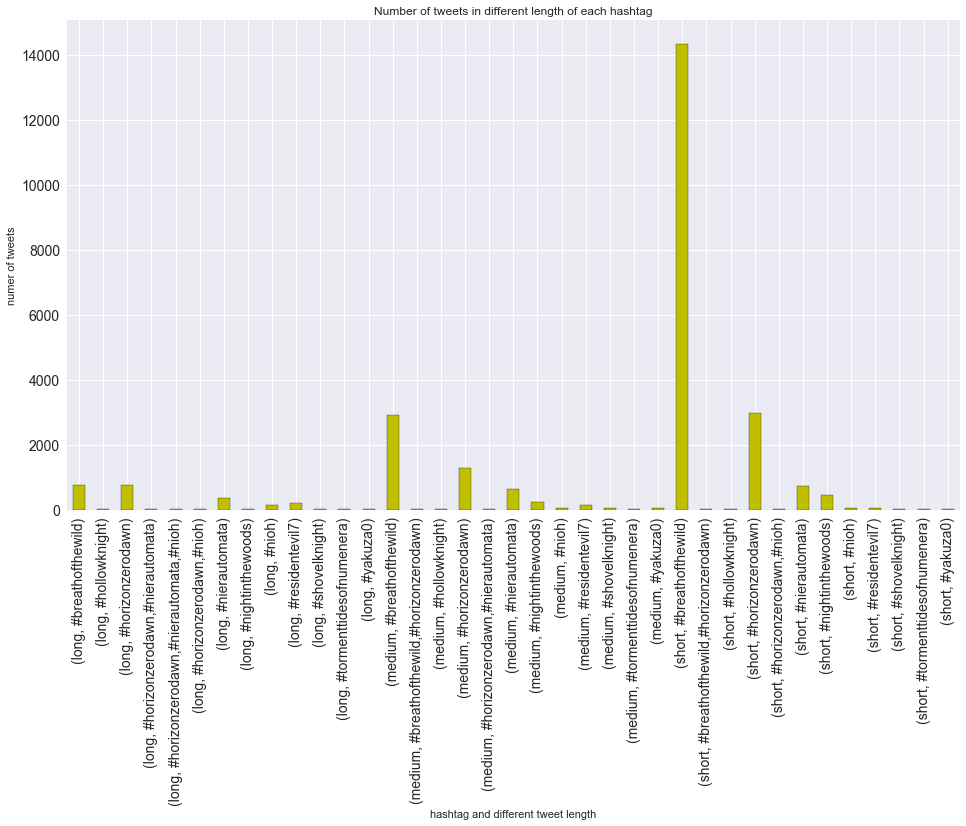

In [19]:
# create a new "tweet_lenght" column
df["tweet_length"] = df["text"].apply(tweet_lengths)

group2 = df.groupby(["tweet_length", "games"]).agg(['count'])
ax = group2["text"]["count"].plot.bar(figsize=(16,9), edgecolor='k', fontsize=14,
                                     title='Number of tweets in different length of each hashtag', color='y')
ax.set(xlabel='hashtag and different tweet length', ylabel='numer of tweets')

As we can see from the plot, short tweets are the most dominating type of tweets. People prefer short and concise for their tweets. With this information, I believe that the actual mean of the sentiment should be a lot higher than what I acquired, because we all love video games!

**Conclusion**: People are happy about all of the newly released games in 2017 (at least before 20 March). And the new Zelda seem to be a very popular choice among gamers, which means that Nintendo Switch also are and will perform very well. Congratulate, Nintendo! But this game seem to be overshadowing a lot of the less-known about but also interesting games(I personally have more interest in trying out Nier, Nioh and Torment than the new Zelda game!).